# Darcy's Law: Flow Through Conical Soil Columns

This assignment will test:

1. Discharge calculations for variable cross-sections
2. Hydraulic and pressure head distributions
3. Finding maximum pressure analytically and numerically
4. Sensitivity analyses
5. Implementing numerical ODE solvers (Euler's method and built in solvers)
6. Comparing numerical and analytical solutions

## Problem Statement

We are analyzing **steady-state flow** through a conical soil column where the radius varies linearly with elevation:

$$x(z) = a + bz$$

where:
- $x(z)$ = radius at elevation $z$ (m)
- $a$ = radius at bottom (m)
- $b$ = rate of radius increase (m/m)
- $z$ = elevation from bottom (m)

### Darcy's Law in Cylindrical Coordinates

For steady flow with velocity $V = K \frac{dH}{dz}$ through circular cross-section $A = \pi x^2$:

$$Q = V \cdot A = \pi x^2 K \frac{dH}{dz} = \pi (a+bz)^2 K \frac{dH}{dz}$$

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.integrate import odeint

# Set up plotting style
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## Problem Parameters
Nothing for you to do here.

In [2]:
# Geometric parameters
a = 0.05        # Bottom radius (m)
b = 0.25        # Rate of radius increase (m/m)
z_height = 1.0  # Column height (m)

# Hydraulic parameters
K = 5.0         # Hydraulic conductivity (m/day)
H_top = 1.1     # Head at top (m)
H_bottom = 0.0  # Head at bottom (m)

# Calculate top radius
r_top = a + b * z_height

print(f"Conical Column Properties:")
print(f"  Bottom radius: {a} m")
print(f"  Top radius: {r_top} m")
print(f"  Height: {z_height} m")
print(f"  Hydraulic conductivity: {K} m/day")
print(f"  Head difference: {H_top - H_bottom} m")

Conical Column Properties:
  Bottom radius: 0.05 m
  Top radius: 0.3 m
  Height: 1.0 m
  Hydraulic conductivity: 5.0 m/day
  Head difference: 1.1 m


---

# Exercise 1: Single-Layer Conical Column

## Exercise 1a: Calculate discharge

In [3]:
def calculate_discharge_single_layer(a, b, K, H_top, z_height):
    """
    Calculate the discharge Q through a single-layer conical column.
    From integration: Q = pi * K * H_top * a * (a + b*z_height)
       
    Parameters:
    -----------
    a : Bottom radius (m) (float)
    b : Rate of radius increase (m/m) (float)
    K : Hydraulic conductivity (m/day) (float)
    H_top : Head at top (m) (float)
    z_height : Column height (m) (float)
    -----------
    Returns:
    Q : Discharge (m^3/day) (float)
    -----------
    """
    Q = np.pi * K * H_top * a * (a + b * z_height)
    return Q

# Test the function
# Calculate discharge Q for the single-layer conical column given parameters 
Q = calculate_discharge_single_layer(a, b, K, H_top, z_height)
print(f"Discharge Q = {Q:.4f} m^3/day")

Discharge Q = 0.2592 m^3/day


## Exercise 1b: Hydraulic head distribution

In [4]:
def hydraulic_head_single_layer(z, Q, a, b, K):
    """
    Calculate hydraulic head H at elevation z in a single-layer conical column.
    Rearranging integrated equation: H = (Q / (pi * K)) * (z / (a * (a + b*z)))

    Parameters:
    -----------
    z : Elevation (m) (float or array)
    Q : Discharge (m^3/day) (float)
    a : Bottom radius (m) (float)
    b : Rate of radius increase (m/m) (float)
    K : Hydraulic conductivity (m/day) (float)
    -----------
    Returns:
    H : Hydraulic head at elevation z (m) (float or array)
    -----------
    """
    H = (Q / (np.pi * K)) * (z / (a * (a + b * z)))
    return H

# Test the function for a range of z values from 0 to 1 with dx of 0.25
z_test = np.arange(0, 1.25, 0.25) # z values from 0 to 1 with step of 0.25 (m)
H_test = hydraulic_head_single_layer(z_test, Q, a, b, K) # Corresponding Hydraulic heads (m)

print("Elevation (m) |  Head (m)")
print("-" * 26)

for z_vals, h_vals in zip(z_test, H_test): # Zip combines two lists element-wise into pairs for iteration
    print(f"{z_vals:8.2f}      |   {h_vals:.4f}\n")


Elevation (m) |  Head (m)
--------------------------
    0.00      |   0.0000

    0.25      |   0.7333

    0.50      |   0.9429

    0.75      |   1.0421

    1.00      |   1.1000



## Exercise 1c: Pressure head

In [5]:
def pressure_head_single_layer(z, Q, a, b, K):
    """
    Calculate pressure head p at elevation z in a single-layer conical column.
    p = H - z
    
    Parameters:
    -----------
    z : Elevation (m) (float or array)
    Q : Discharge (m^3/day) (float)
    a : Bottom radius (m) (float)
    b : Rate of radius increase (m/m) (float)
    K : Hydraulic conductivity (m/day) (float)
    -----------
    Returns:
    p : Pressure head at elevation z (m) (float or array)
    -----------
    """
    p_head = hydraulic_head_single_layer(z, Q, a, b, K) - z
    return p_head

# Create an array of z values from 0 to 1 with 100 points
# Calculate corresponding H and p values for each z value
z_array = np.linspace(0, 1.0, 100)
H_array = hydraulic_head_single_layer(z_array, Q, a, b, K) # Array of calculated Hydraulic heads
p_array = pressure_head_single_layer(z_array, Q, a, b, K)  # Array of calculated Pressure heads

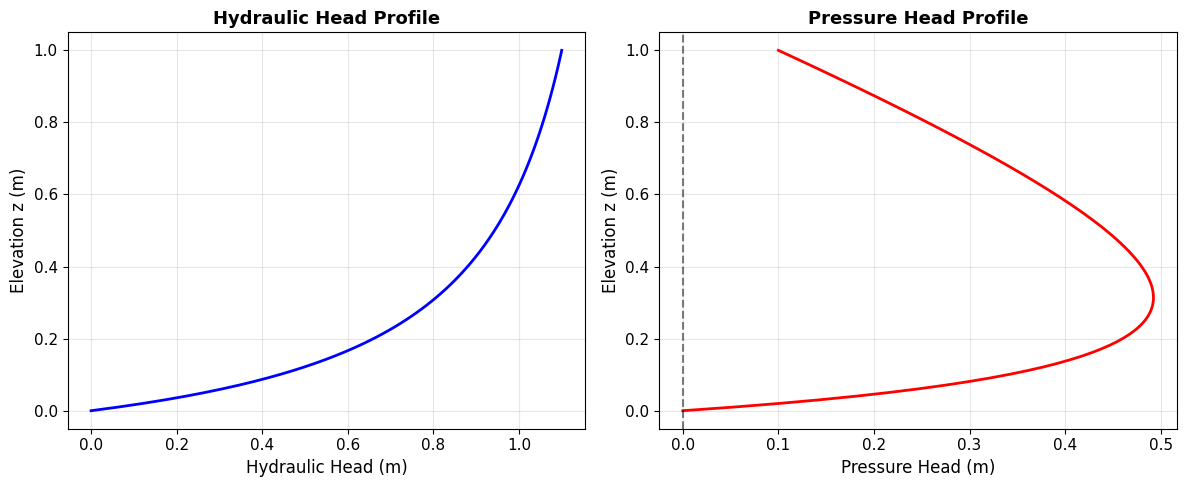

In [6]:
# Plotting the results - nothing for you to change here, but you need to complete the functions above
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Hydraulic Head Profile
ax1.plot(H_array, z_array, 'b-', linewidth=2)
ax1.set_xlabel('Hydraulic Head (m)', fontsize=12)
ax1.set_ylabel('Elevation z (m)', fontsize=12)
ax1.set_title('Hydraulic Head Profile', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Pressure Head Profile
ax2.plot(p_array, z_array, 'r-', linewidth=2)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('Pressure Head (m)', fontsize=12)
ax2.set_ylabel('Elevation z (m)', fontsize=12)
ax2.set_title('Pressure Head Profile', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./plots/HW5_HeadProfiles.png')
plt.show()


---

# Exercise 2: Finding Maximum Pressure

## Exercise 2a: Analytical solution

In [7]:
def find_max_pressure_analytical(a, b, Q, K):
    """
    Find the location and value of maximum pressure head in a single-layer conical column.
    This is done by setting the derivative of the pressure head equation to zero and solving
    the resulting quadratic equation.
    
    Quadratic: b^2 * z^2 + 2abz + (a² - Q/(pi * K)) = 0

    Parameters:
    -----------
    a : Bottom radius (m) (float)
    b : Rate of radius increase (m/m) (float)
    Q : Discharge (m^3/day) (float)
    K : Hydraulic conductivity (m/day) (float)
    -----------
    Returns:
    z_max : Elevation of maximum pressure head (m) (float)
    p_max : Maximum pressure head (m) (float)
    -----------
    """
    # Coefficients of quadratic equation Az^2 + Bz + C = 0
    A = b**2
    B = 2 * a * b
    C = a**2 - Q / (np.pi * K)

    z_max = (-B + np.sqrt(B**2 - 4 * A * C)) / (2 * A)  # Positive root for max pressure location
    p_max = pressure_head_single_layer(z_max, Q, a, b, K) # Calculate max pressure head at z_max
    
    return z_max, p_max

# Test the function
# Analytical solution for max pressure location and value
z_max_ana, p_max_ana = find_max_pressure_analytical(a, b, Q, K) 

print(f"Analytical Solution:")
print(f"  Location: z_max = {z_max_ana:.4f} m")
print(f"  Maximum pressure: p_max = {p_max_ana:.4f} m")

Analytical Solution:
  Location: z_max = 0.3138 m
  Maximum pressure: p_max = 0.4924 m


## Exercise 2b: Numerical optimization

In [8]:
def objective(z, a=a, b=b, Q=Q, K=K):
    """
    Objective function to minimize (negative pressure head).
    This is used for numerical optimization to find maximum pressure head.

    Parameters:
    -----------
    z : Elevation (m) (float)
    a : Bottom radius (m) (float)
    b : Rate of radius increase (m/m) (float)
    Q : Discharge (m^3/day) (float)
    K : Hydraulic conductivity (m/day) (float)
    -----------
    Returns:
    Negative pressure head at elevation z (m) (float)
    -----------
    """
    return -pressure_head_single_layer(z, Q, a, b, K) 

def find_max_pressure_numerical(a, b, Q, K, z_range=(0, 1)):
    """
    Find the location and value of maximum pressure head in a single-layer conical column
    using numerical optimization.
    
    Parameters:
    -----------
    a : Bottom radius (m) (float)
    b : Rate of radius increase (m/m) (float)
    Q : Discharge (m^3/day) (float)
    K : Hydraulic conductivity (m/day) (float)
    z_range : Tuple specifying the range of z to search (m) (tuple)
    -----------
    Returns:
    z_max : Elevation of maximum pressure head (m) (float)
    p_max : Maximum pressure head (m) (float)
    -----------
    """
   
    # Use minimize_scalar with bounded method
    result = minimize_scalar(objective, bounds=z_range, method='bounded')
    
    # Extract results - nothing to do here, but note how it works!
    z_max = result.x     # Location of maximum pressure head
    p_max = -result.fun  # Negate back to get maximum value
    
    return z_max, p_max


In [9]:
# Test and compare
# Calculate max pressure location and value numerically
z_max_num, p_max_num = find_max_pressure_numerical(a, b, Q, K)

print(f"Numerical Solution:")
print(f"  Location: z_max = {z_max_num:.4f} m")
print(f"  Maximum pressure: p_max = {p_max_num:.4f} m")
print(f"\nDifference from analytical:")
print(f"  dz = {abs(z_max_ana - z_max_num):.6f} m")
print(f"  dp = {abs(p_max_ana - p_max_num):.6f} m")

Numerical Solution:
  Location: z_max = 0.3138 m
  Maximum pressure: p_max = 0.4924 m

Difference from analytical:
  dz = 0.000000 m
  dp = 0.000000 m


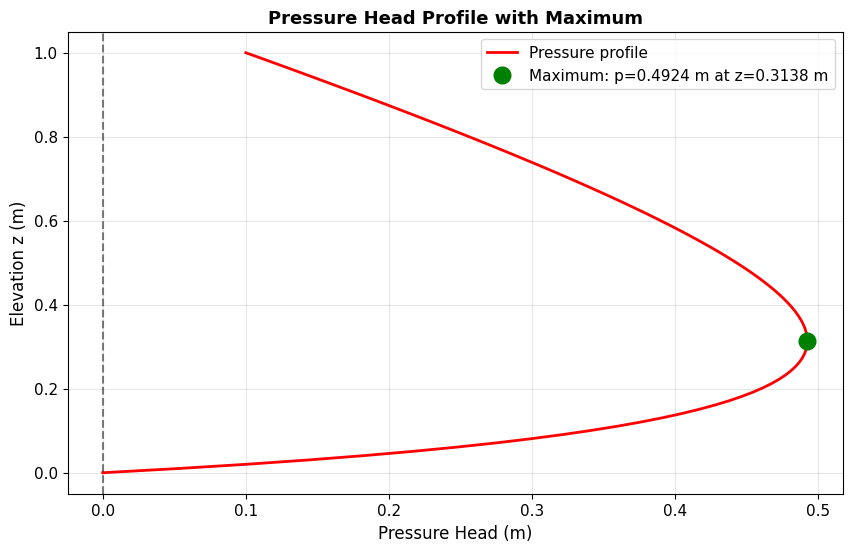

In [10]:
# Visualize maximum on pressure profile - nothing to change here
# but you need to complete the functions above, you should be able to 
# see the maximum point on the pressure profile plot to confirm your solution

plt.figure(figsize=(10, 6))
plt.plot(p_array, z_array, 'r-', linewidth=2, label='Pressure profile')
plt.plot(p_max_num, z_max_num, 'go', markersize=12, 
         label=f'Maximum: p={p_max_num:.4f} m at z={z_max_num:.4f} m')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Pressure Head (m)', fontsize=12)
plt.ylabel('Elevation z (m)', fontsize=12)
plt.title('Pressure Head Profile with Maximum', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('./plots/HW5_PressHeadProfwMax.png')
plt.show()

---

# Exercise 3: Sensitivity Analysis

In this exercise, you will analyze how the maximum pressure head and its location change with variations in the parameters $a$ and $b$. This will help you understand the influence of the column's geometry on the pressure distribution, as well as checking your understanding of using nested loops and storing results in arrays.

In [11]:
# SOLUTION
# Create arrays of a and b values to test
a_values = np.linspace(0.02, 0.10, 30) # 30 values from 0.02 to 0.10 for a
b_values = np.linspace(0.10, 0.50, 30) # 30 values from 0.10 to 0.50 for b

# This creates a grid of (a, b) pairs to evaluate Q over the parameter space
# Meshgrid creates coordinate matrices from coordinate vectors
# A and B will be 2D arrays where each (i, j) element corresponds to a specific (a, b) pair
A, B = np.meshgrid(a_values, b_values)

# Calculate Q for each combination
# Initialize Q_matrix to store results
Q_matrix = np.zeros_like(A)

# Loop through each (a, b) pair to compute Q, and store in Q_matrix
Q_matrix = [calculate_discharge_single_layer(a, b, K, H_top, z_height) for a, b in zip(A, B)]


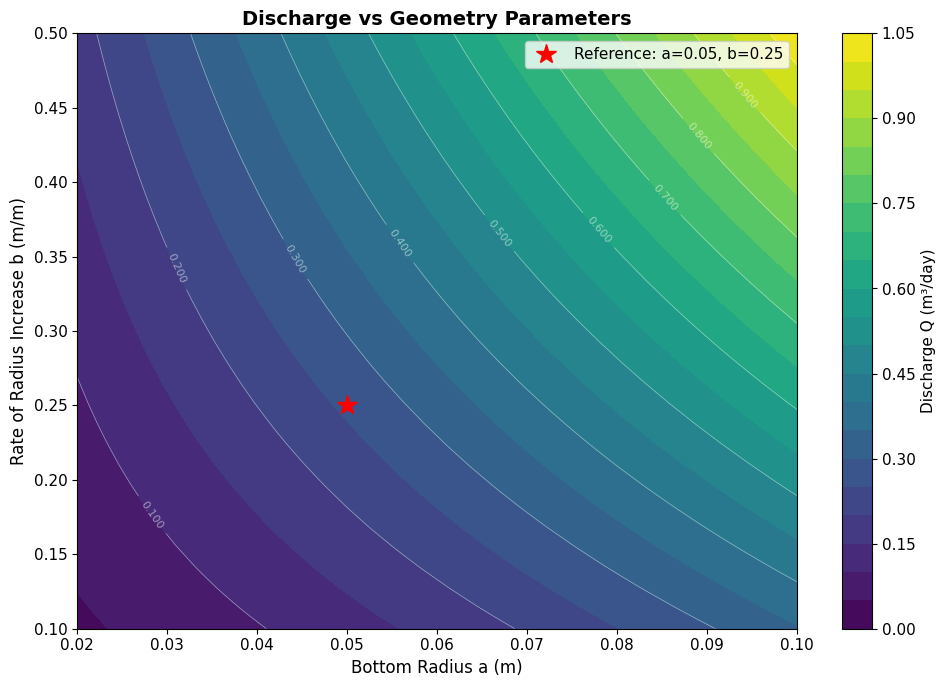

In [12]:
# Create contour plot - nothing to change here, but you need to have the Q_matrix calculated above
plt.figure(figsize=(10, 7))
contour = plt.contourf(A, B, Q_matrix, levels=20, cmap='viridis')
cbar = plt.colorbar(contour, label='Discharge Q (m³/day)')
plt.xlabel('Bottom Radius a (m)', fontsize=12)
plt.ylabel('Rate of Radius Increase b (m/m)', fontsize=12)
plt.title('Discharge vs Geometry Parameters', fontsize=14, fontweight='bold')

# Add reference point
plt.plot(a, b, 'r*', markersize=15, label=f'Reference: a={a}, b={b}')
plt.legend()

# Add contour lines
CS = plt.contour(A, B, Q_matrix, levels=10, colors='white', alpha=0.5, linewidths=0.5)
plt.clabel(CS, inline=True, fontsize=8, fmt='%.3f')

plt.tight_layout()
plt.savefig('./plots/HW5_DischargeContour.png')
plt.show()


---

# Exercise 4: Implement Your Own ODE Solver

In this exercise, you will implement **Euler's method** to solve the ODE:

$$\frac{dH}{dz} = \frac{Q}{\pi (a+bz)^2 K}$$

with initial condition $H(0) = 0$.

## Background

### Euler's Method
Forward Euler is the simplest numerical method:
$$H_{i+1} = H_i + \Delta z \cdot f(z_i, H_i)$$

In [13]:
# Define the ODE right-hand side
def dH_dz_func(z, H, a=a, b=b, K=K, Q=Q):
    """
    RHS of ODE: dH/dz = Q / [pi(a+bz)^2 K]
    
    Parameters:
    -----------
    z : Elevation (m) (float)
    H : Hydraulic head (m) (float)
    a : Bottom radius (m) (float)
    b : Rate of radius increase (m/m) (float)
    K : Hydraulic conductivity (m/day) (float)
    Q : Discharge (m^3/day) (float)
    -----------
    Returns:
    dH/dz : Rate of change of hydraulic head with elevation (m/m) (float)
    -----------
    """
    return Q / (np.pi * (a + b * z)**2 * K)

# Euler's method implementation - note the inclusion of a function as input!!
def euler_method(f, z0, H0, z_end, num_steps):
    """
    Solve ODE dH/dz = f(z, H) using Euler's method.
    
    Parameters:
    -----------
    f : function Right-hand side of ODE: f(z, H) = dH/dz
    z0 : Initial elevation (m) (float)
    H0 : Initial hydraulic head (m) (float)
    z_end : Final elevation (m) (float)
    num_steps : Number of steps (int)
        
    Returns:
    --------
    z_values : Array of z positions
    H_values : Array of H values at each z
    """
    # Calculate step size using z_end, z0, and num_steps
    dz = (z_end - z0) / num_steps
    
    # Initialize arrays
    z_values = np.zeros(num_steps + 1) # +1 to include initial condition
    H_values = np.zeros(num_steps + 1) # +1 to include initial condition

    #Set initial conditions
    z_values[0] = z0
    H_values[0] = H0
    
    # Euler's method iteration
    for i in range(num_steps):
        H_values[i + 1] = H_values[i] + dz * f(z_values[i], H_values[i]) # Update H using the function f
        z_values[i + 1] = z_values[i] + dz # Update z by dz
        
    return z_values, H_values

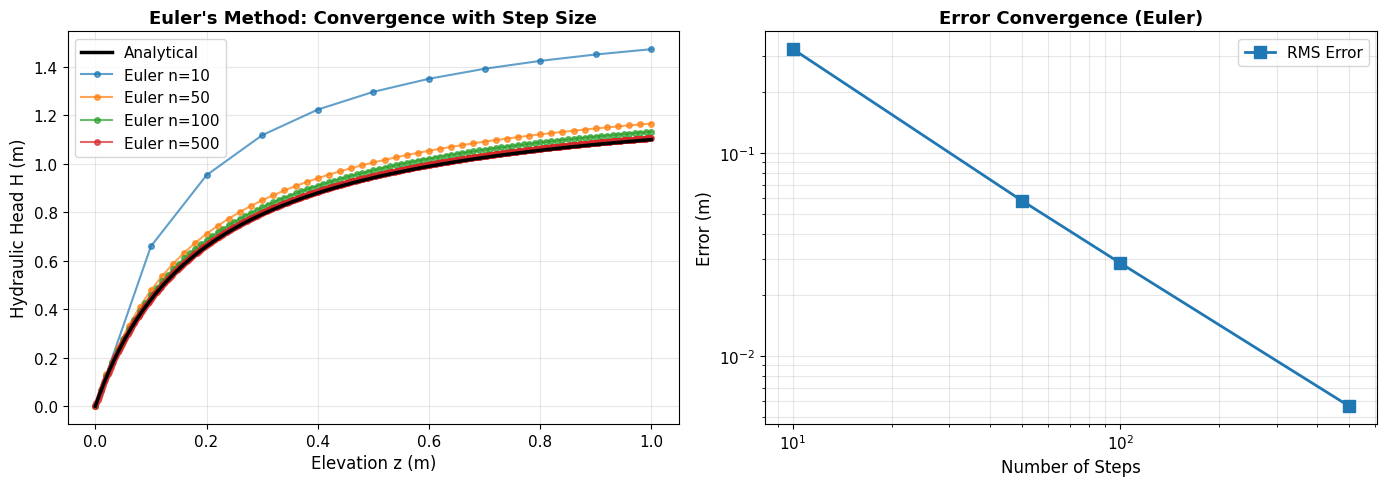

In [14]:
# Test with different step sizes - Nothing for you to change here, but you need to have the 
# euler_method and dH_dz_func defined and working from the previous cells
step_counts = [10, 50, 100, 500]
plt.figure(figsize=(14, 5))

# Left plot: Hydraulic head profiles from Euler's method and analytical solution
plt.subplot(1, 2, 1)
z_analytical = np.linspace(0, 1, 500)
H_analytical = hydraulic_head_single_layer(z_analytical, Q, a, b, K)
plt.plot(z_analytical, H_analytical, 'k-', linewidth=2.5, label='Analytical', zorder=10)

# Euler's method solutions with different step counts
for n_steps in step_counts:
    z_euler, H_euler = euler_method(dH_dz_func, 0, 0, 1.0, n_steps)
    plt.plot(z_euler, H_euler, 'o-', linewidth=1.5, markersize=4, 
             label=f'Euler n={n_steps}', alpha=0.7)

plt.xlabel('Elevation z (m)', fontsize=12)
plt.ylabel('Hydraulic Head H (m)', fontsize=12)
plt.title("Euler's Method: Convergence with Step Size", fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Right plot: Error convergence analysis
plt.subplot(1, 2, 2)
errors_max = []
errors_rms = []
for n_steps in step_counts:
    z_euler, H_euler = euler_method(dH_dz_func, 0, 0, 1.0, n_steps)
    H_ana_interp = hydraulic_head_single_layer(z_euler, Q, a, b, K)
    error = np.abs(H_euler - H_ana_interp)
    errors_rms.append(np.sqrt(np.mean(error**2)))

plt.loglog(step_counts, errors_rms, 's-', linewidth=2, markersize=8, label='RMS Error')

# Add reference line for first-order convergence
plt.xlabel('Number of Steps', fontsize=12)
plt.ylabel('Error (m)', fontsize=12)
plt.title('Error Convergence (Euler)', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('./plots/HW5_EulerConvergence.png')
plt.show()


---

# Exercise 5: Numerical ODE Solution using `scipy.integrate.odeint`

Here I want you to use the built-in `odeint` function from `scipy.integrate` to solve the same ODE as in Exercise 6, and then compare your results with the analytical solution. The goal of this exercise is for you to learn how to use a standard library function for solving ODEs, which is often more efficient and accurate than simple methods that you might implement yourself. It is also a test of your ability to read documentation and apply it to a specific problem.

In [15]:
def solve_ode_numerically(z_span=(0, 1), num_points=10):
    """
    Solve the ODE dH/dz = Q / [pi(a+bz)^2 K] using scipy's odeint.
    
    Parameters:
    -----------
    z_span : Tuple specifying the range of z to solve over (m) (tuple)
    num_points : Number of points in z array (int)
    -----------
    Returns:
    z_array : Array of z positions (m) (array)
    H_numerical : Array of H values at each z (m) (array)
    -----------
    """
    # Create z array
    z_array = np.linspace(z_span[0], z_span[1], num_points)
   
    # Solve with initial condition H(0) = 0
    H_numerical = odeint(dH_dz_func, 0, z_array, tfirst=True)#.flatten())  # Flatten to convert from 2D to 1D array
    
    return z_array, H_numerical 


# This will call your function to test it - for fun, try different values of num_points
# and see how the error changes compared to the Euler method you implemented above
num_points = 10000
z_array, H_numerical = solve_ode_numerically(z_span=(0, 1), num_points=num_points)

# Get analytical solution for comparison
H_analytical = hydraulic_head_single_layer(z_array, Q, a, b, K)

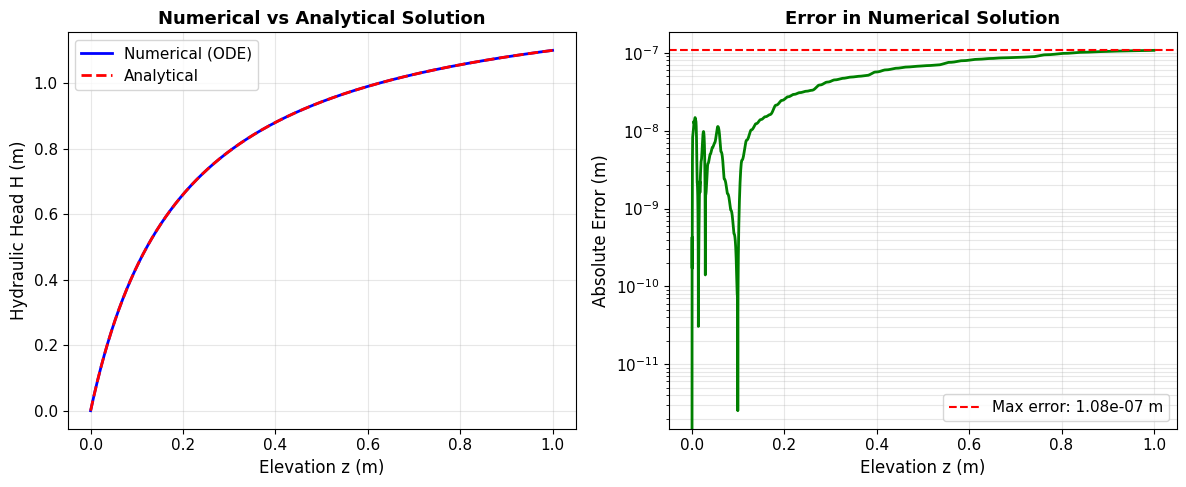


Numerical ODE Solution Statistics:
  Number of points: 10000
  Maximum error: 1.078443e-07 m
  RMS error: 7.123622e-08 m


In [16]:
# Calculate error
error = np.abs(H_numerical.flatten() - H_analytical.flatten()) # Flatten to convert from 2D to 1D array
max_error = np.max(error)
rms_error = np.sqrt(np.mean(error**2))

# Plot comparison - nothing to change from here on out, but you need to have the
# solve_ode_numerically function defined and working above
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Solutions: Hydraulic Head Profile Comparison 
ax1.plot(z_array, H_numerical, 'b-', linewidth=2, label='Numerical (ODE)')
ax1.plot(z_array, H_analytical, 'r--', linewidth=2, label='Analytical')
ax1.set_xlabel('Elevation z (m)', fontsize=12)
ax1.set_ylabel('Hydraulic Head H (m)', fontsize=12)
ax1.set_title('Numerical vs Analytical Solution', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Error plot - note use of semilogy for log scale on y-axis
ax2.semilogy(z_array, error, 'g-', linewidth=2)
ax2.axhline(y=max_error, color='r', linestyle='--', 
            label=f'Max error: {max_error:.2e} m')
ax2.set_xlabel('Elevation z (m)', fontsize=12)
ax2.set_ylabel('Absolute Error (m)', fontsize=12)
ax2.set_title('Error in Numerical Solution', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('./plots/HW5_NumericalODEvsAnalytical.png')
plt.show()

print(f"\nNumerical ODE Solution Statistics:")
print(f"  Number of points: {num_points}")
print(f"  Maximum error: {max_error:.6e} m")
print(f"  RMS error: {rms_error:.6e} m")

# Exercise 6: Compare Numerical and Analytical Solutions

Your task is to compare the numerical solution from your Euler's method implementation and the `odeint` solution with the analytical solution for the hydraulic head distribution. Make a figure that shows both solutions on the same plot for a given set of parameters. Use N=100 steps for the numerical solution and the parameters used in the prior steps. This last step is open ended and you can choose how to present the results.

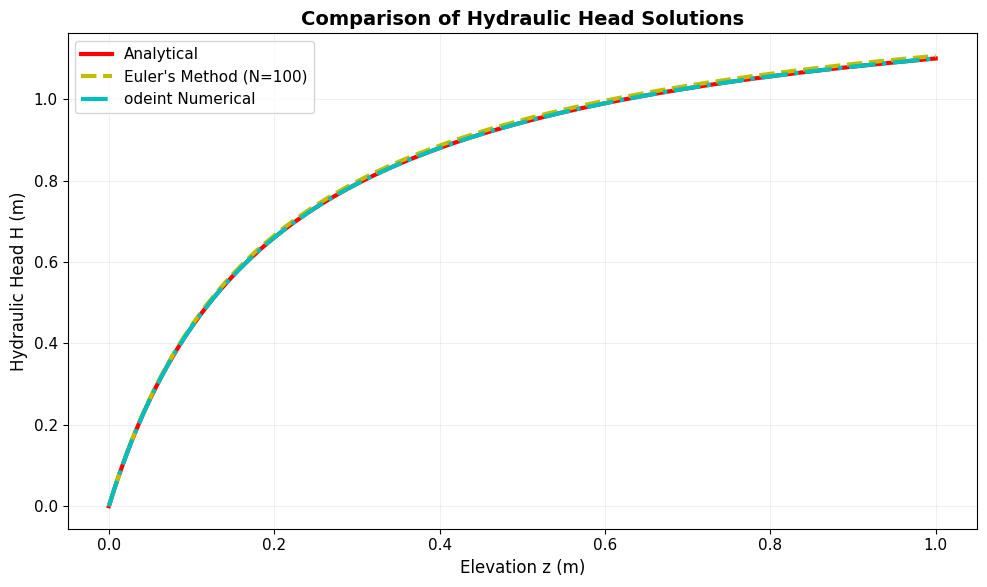

In [17]:
# Compare Euler, odeint, and analytical solutions for hydraulic head

# Create figure
plt.figure(figsize=(10, 6))
# plt.style.use('dark_background')

# Analytical solution
plt.plot(z_array, hydraulic_head_single_layer(z_array, Q, a, b, K), 'r-', linewidth=3, label='Analytical')

# Euler's method (already computed as H_euler, z_euler)
plt.plot(z_euler, H_euler, 'y--', linewidth=3, label="Euler's Method (N=100)")

# odeint solution (already computed as H_numerical, z_array)
plt.plot(z_array, H_numerical, 'c-.', linewidth=3, label='odeint Numerical')

# Plot settings
plt.xlabel('Elevation z (m)', fontsize=12)
plt.ylabel('Hydraulic Head H (m)', fontsize=12)
plt.title('Comparison of Hydraulic Head Solutions', fontsize=14, fontweight='bold')
plt.legend()

plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.savefig('./plots/HW5_EulervNumvAnalytical.png')
plt.show()
